<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week12-SVM/svm_short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

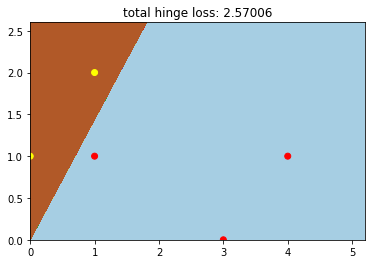

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def hinge_loss(w,x,y):
    """ evaluates hinge loss and its gradient at w

    rows of x are data points
    y is a vector of labels
    """
    loss,grad = 0,0
    for (x_,y_) in zip(x,y):
        v = y_*np.dot(w,x_)
        loss += max(0,1-v)
        grad += 0 if v > 1 else -y_*x_
    return (loss,grad)

def grad_descent(x,y,w,step,thresh=0.001):
    grad = np.inf
    ws = np.zeros((2,0))
    ws = np.hstack((ws,w.reshape(2,1)))
    step_num = 1
    delta = np.inf
    loss0 = np.inf
    while np.abs(delta)>thresh:
        loss,grad = hinge_loss(w,x,y)
        delta = loss0-loss
        loss0 = loss
        grad_dir = grad/np.linalg.norm(grad)
        w = w-step*grad_dir/step_num
        ws = np.hstack((ws,w.reshape((2,1))))
        step_num += 1
    return np.sum(ws,1)/np.size(ws,1)

def test1():
    # sample data points
    x1 = np.array((0,1,3,4,1))
    x2 = np.array((1,2,0,1,1))
    x  = np.vstack((x1,x2)).T
    # sample labels
    y = np.array((1,1,-1,-1,-1))
    w = grad_descent(x,y,np.array((0,0)),0.1)
    loss, grad = hinge_loss(w,x,y)
    plot_test(x,y,w)

def plot_test(x,y,w):
    plt.figure()
    x1, x2 = x[:,0], x[:,1]
    x1_min, x1_max = np.min(x1)*.7, np.max(x1)*1.3
    x2_min, x2_max = np.min(x2)*.7, np.max(x2)*1.3
    gridpoints = 2000
    x1s = np.linspace(x1_min, x1_max, gridpoints)
    x2s = np.linspace(x2_min, x2_max, gridpoints)
    gridx1, gridx2 = np.meshgrid(x1s,x2s)
    grid_pts = np.c_[gridx1.ravel(), gridx2.ravel()]
    predictions = np.array([np.sign(np.dot(w,x_)) for x_ in grid_pts]).reshape((gridpoints,gridpoints))
    plt.contourf(gridx1, gridx2, predictions, cmap=plt.cm.Paired)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=colors.ListedColormap(['red', 'yellow']))
    plt.title('total hinge loss: %g' % hinge_loss(w,x,y)[0])
    plt.show()

if __name__ == '__main__':
    np.set_printoptions(precision=3)
    test1()